In [171]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

%matplotlib inline

In [8]:
tpfname = lk.search_tesscut('5:33:05.28 -69:30:31.44', sector=2, )
tpf = tpfname.download(cutout_size=50)

In [10]:
tpf.interact()

In [31]:
tpf.flux[:,:,:] = tpf.flux - np.median(tpf.flux, axis=0)

In [86]:
pmask = np.zeros_like(tpf.flux[0], dtype=bool)
pmask[24:27, 24:27] = 1
tpf.interact(aperture_mask=pmask)

In [126]:
subarr = np.array([tpf.flux[i] -  np.median(tpf.flux, axis=1)[i] for i in range(1228)])

In [301]:
utime, uflux, uerr = np.genfromtxt('ulen2.txt', skip_header=10, unpack=True, usecols=[0,1,2])

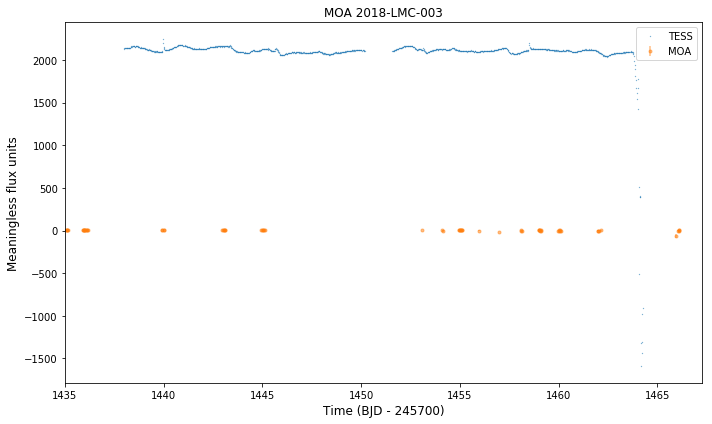

In [302]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True)
ax.plot(tpf.time, subarr[:,pmask].sum(axis=1) + 335, '.', ms=0.5, zorder=100, label='TESS')

ax.errorbar(utime-2457000, uflux/10000, yerr=uerr/10000, fmt='.', alpha=0.5, label='MOA')
ax.set_title('MOA 2018-LMC-003')
ax.set_xlim(tpf.time.min()-3, tpf.time.max()+3)
ax.set_xlabel('Time (BJD - 245700)', fontsize=12)
ax.set_ylabel('Meaningless flux units', fontsize=12)
ax.legend()
fig.tight_layout()
# fig.savefig('MOA-2018-LMC-003-TESS.png', dpi=200)

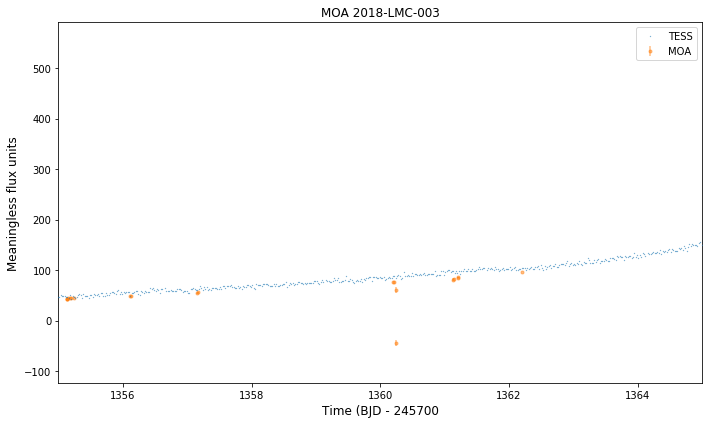

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True)
ax.plot(tpf.time, subarr[:,pmask].sum(axis=1) + 335, '.', ms=0.5, zorder=100, label='TESS')

ax.errorbar(utime-2457000, uflux/10000, yerr=uerr/10000, fmt='.', alpha=0.5, label='MOA')
ax.set_title('MOA 2018-LMC-003')
ax.set_xlim(1355,1365)
# ax.set_ylim(80,120)
ax.set_xlabel('Time (BJD - 245700', fontsize=12)
ax.set_ylabel('Meaningless flux units', fontsize=12)
ax.legend()
fig.tight_layout()
# fig.savefig('MOA-2018-LMC-003-TESS.png', dpi=200)

In [166]:
np.savetxt('MOA-2018-LMC-003-TESS.csv', np.array([tpf.time, subarr[:,pmask].sum(axis=1)]).T, delimiter=',')

In [111]:
tpf.flux[:, ~pmask].shape

(1228, 2491)

In [174]:
smooth = savgol_filter(subarr[:,pmask].sum(axis=1), 101, polyorder=2)

In [182]:
plt.plot(tpf.time, subarr[:,pmask].sum(axis=1))
plt.plot(tpf.time, smooth)
plt.ylim(-300, -200)

AttributeError: 'NoneType' object has no attribute 'time'

In [180]:
np.std((subarr[:,pmask].sum(axis=1) - smooth)[0:300])

2.6329346

In [229]:
tpf = lk.search_tesscut('PDS 11b').download(cutout_size=20)

In [232]:
pmask = np.zeros_like(tpf.flux[0], dtype=bool)
pmask[8:12, 8:12] = 1
tpf.interact(aperture_mask=pmask)

In [247]:




lc = tpf.extract_aperture_photometry(aperture_mask=pmask, )


bg = np.reshape(tpf.flux, (1188,400))
bg = np.median(bg, axis=1)

In [250]:
lc.flux -= bg

In [251]:
lcn = lc.normalize()

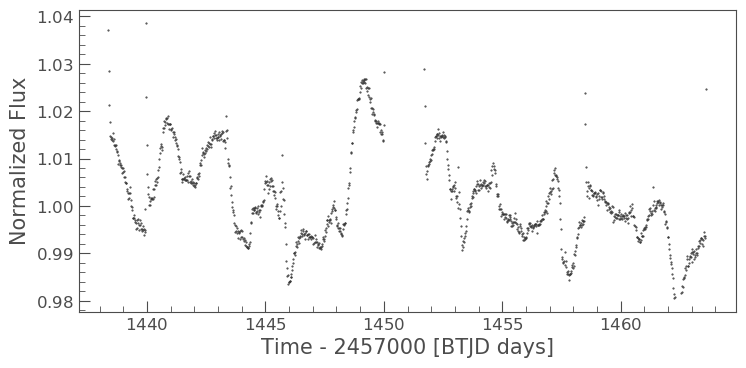

In [274]:
lcn[(lcn.flux > 0.98) * (lcn.flux < 1.04)].plot(marker='.', ls='')
plt.savefig('pds11.png')

In [268]:

q = lcn[(lcn.flux > 0.97) * (lcn.flux < 1.04)]

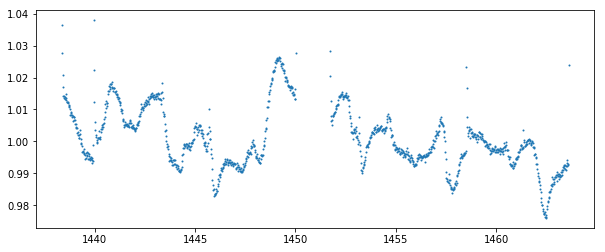

In [269]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
plt.plot(q.time, q.flux, '.', ms=2)


In [225]:
tpf.flux[0] 

array([[ 222.96658,  278.6454 ,  279.75214,  219.68974,  206.74983,
         211.19733,  236.3921 ,  305.5869 ,  305.47028,  229.03786,
         215.77803,  213.87021,  208.97607,  212.30287,  218.59444,
         213.84634,  206.63554,  209.99393,  222.26381,  246.08786],
       [ 244.36494,  414.00137,  424.26083,  243.94743,  210.21078,
         223.42137,  309.6644 ,  671.9712 ,  620.4986 ,  278.90518,
         217.58185,  214.50754,  210.88603,  216.36848,  218.94621,
         214.66852,  208.72615,  210.98009,  219.77492,  226.86502],
       [ 230.17824,  290.64752,  280.97238,  223.37077,  213.40422,
         231.46156,  289.7304 ,  508.9959 ,  469.01593,  258.36862,
         219.91093,  217.57466,  212.52248,  210.62651,  215.58035,
         215.84846,  211.64827,  209.64014,  219.1381 ,  226.8735 ],
       [ 213.72624,  227.72469,  221.47353,  214.18681,  212.47931,
         219.24872,  242.97325,  288.96503,  262.63766,  228.71605,
         218.74051,  217.96356,  212.55173,  

In [289]:
lc = lk.search_lightcurvefile('TIC 24518895', mission='TESS').download()
# lck = lk.search_lightcurvefile('LDS 5606', mission='K2').download() 

(1447, 1449)

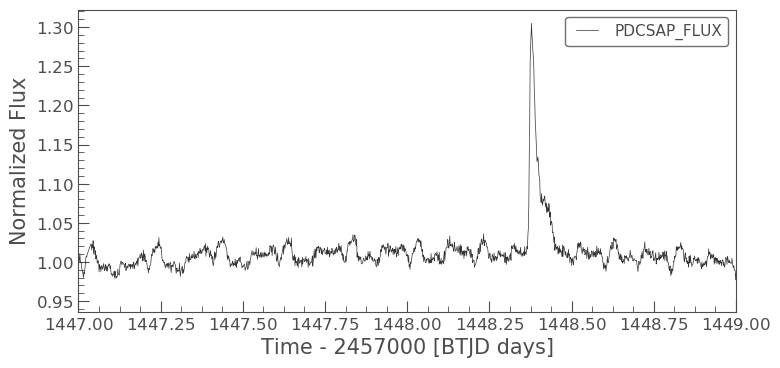

In [298]:
lc.plot('PDCSAP_FLUX')
# lck.plot()
plt.gca().set_xlim(1447,1449)

In [303]:
utime, uflux, uerr = np.genfromtxt('ulen2.txt', skip_header=10, unpack=True, usecols=[0,1,2])

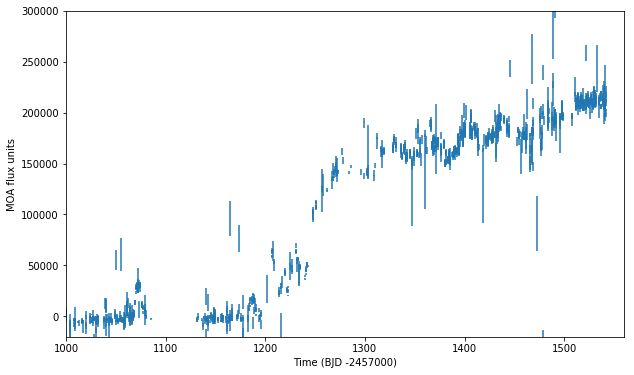

In [317]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True)
plt.errorbar(utime-2457000, uflux, yerr=uerr, ls='')
plt.xlim(1000,1560)
plt.ylim(-20000,300000)
plt.xlabel('Time (BJD -2457000)')
plt.ylabel('MOA flux units')
plt.savefig('lmc2.png')